<a href="https://colab.research.google.com/github/369koushil/ML_algos/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
# pip install ucimlrepo
# pip install sklearn

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [146]:
data=load_iris()
x=data.data
y=data.target

In [147]:
df=pd.DataFrame(x,columns=data.feature_names)
df['Target']=y

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
df.shape

(150, 5)

In [150]:
X=df.iloc[:,:4]
y=df.iloc[:,4:]

In [151]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [152]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [153]:
model=DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],        # Split quality
    'max_depth': [None, 3, 5, 10, 20, 25],                   # Controls tree depth
    'min_samples_split': [20,30,40,50],                    # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],                      # Min samples at a leaf node
    'max_features': [None, 'sqrt', 'log2'],             # Number of features to consider for best split
    'ccp_alpha': [0.0, 0.01, 0.05]                      # Post-pruning parameter
}

In [154]:
dCv=RandomizedSearchCV(model,param_grid,n_jobs=-1,cv=5,verbose=True)

In [155]:
dCv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.01, 0.05],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 3, 5, 10, 20, 25],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [20, 30, 40, 50]},
                   verbose=True)

In [156]:
y_predicted=dCv.predict(x_test)

In [157]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [158]:
print("\nAccuracy\n",accuracy_score(y_test,y_predicted))
print("\nconfusion matrix\n",confusion_matrix(y_test,y_predicted))
print("classification report",classification_report(y_test,y_predicted))


Accuracy
 0.8947368421052632

confusion matrix
 [[13  0  0]
 [ 0 15  1]
 [ 0  3  6]]
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      0.94      0.88        16
           2       0.86      0.67      0.75         9

    accuracy                           0.89        38
   macro avg       0.90      0.87      0.88        38
weighted avg       0.90      0.89      0.89        38



In [159]:
dCv.best_estimator_
dCv.best_params_

{'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'log_loss',
 'ccp_alpha': 0.01}

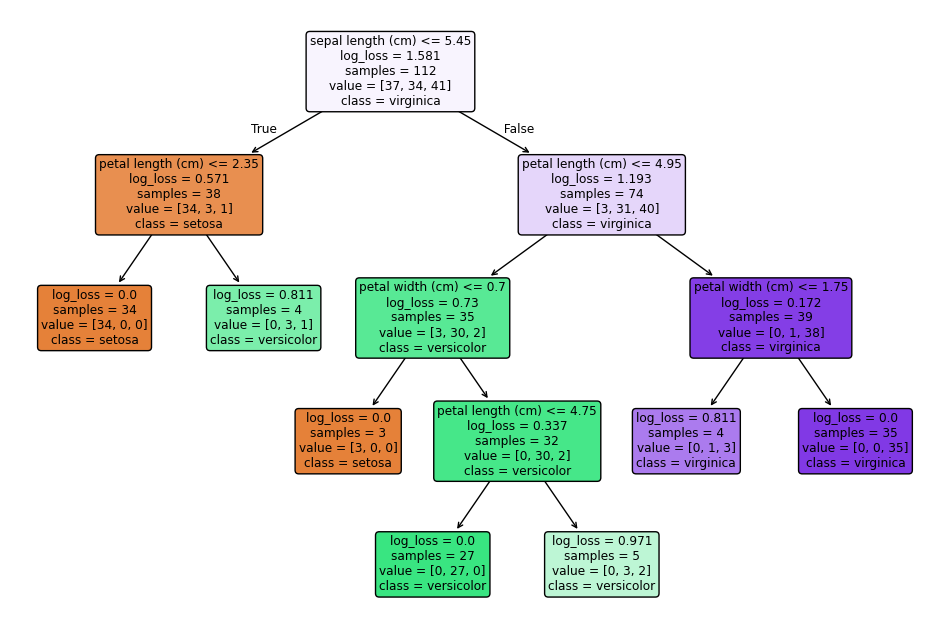

In [160]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(dCv.best_estimator_,
          feature_names=data.feature_names,
          class_names=data.target_names,
          filled=True,
          rounded=True)
plt.show()

In [161]:
## Decision tree Regression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [162]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Target']=data.target
df.shape

(20640, 9)

In [163]:
X=df.iloc[:,:8]
y=df.iloc[:,8:]

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [700,800,1200,1400],
    'min_samples_leaf': [10,20,30]
}
regressor = DecisionTreeRegressor(random_state=42)

In [201]:
grid_search = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [204]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [700, 800, 1200, 1400]},
             scoring='neg_mean_squared_error', verbose=1)

In [182]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [205]:
y_pred = grid_search.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 0.5074638858216284
RMSE: 0.7123649948036669
MAE: 0.5116564530715927
R²: 0.6127438881692868


In [168]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}

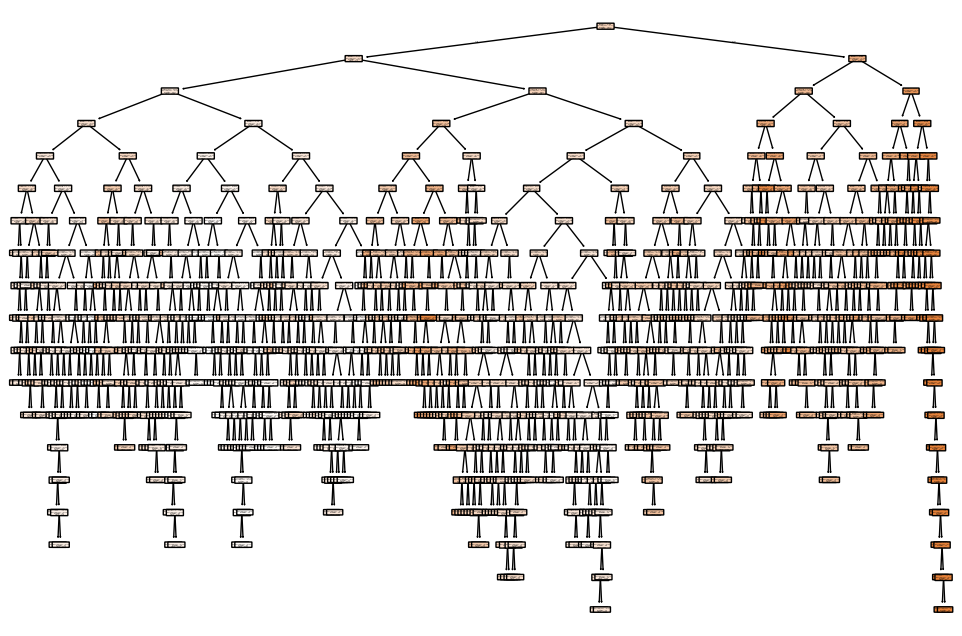

In [188]:
plt.figure(figsize=(12, 8))
plot_tree(grid_search.best_estimator_,
          feature_names=data.feature_names,
          filled=True,
          rounded=True)
plt.show()